# 스터디 3주차 : SVM 및 Decision Tree

- [Kaggle : Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)
- [Kaggle Clone Coding Notebook](https://www.kaggle.com/joparga3/in-depth-skewed-data-classif-93-recall-acc-now)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
data = pd.read_csv("C:/Users/yoonj/Desktop/kaggle_study/3주차/creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


#### 데이터셋 특징
2013년 9월 유럽의 신용카드 사용자들의 실제 거래기록으로 284,807건의 거래 내역 중 492건 만이 사기 거래인 매우 '불균형한' 특징을 지님

#### 변수 설명
- V1 ~ V28 : 개인정보로 공개되지 않은 값
- Time : 시간
- Amount : 거래금액
- Class(사기 여부) : 1=사기, 0=정상

### Part1. EDA

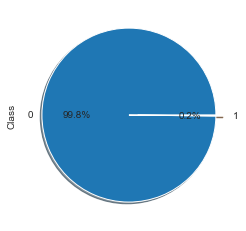

In [3]:
data['Class'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)

정상 거래와 부정 거래 건의 비율이 매우 불균형하여, 모든 데이터가 '정상 거래'라고 판단하여도 정확도가 매우 높음

#### 접근방법
-  성능 측정 방식 변경
    1. 혼동행렬 
        > Recall(재현율) : 모든 true 중 실제로 true로 예측한 비율 (TP/(TP+FN))
    2. F1-Score : Precision(정밀도)와 Recall의 조화평균 (정밀도와 재현율은 서로 반비례 관계 >> 어느 쪽에도 치우쳐지지 않은 성능 측정)
        > Precision : true로 예측한 것 중 실제로 true인 비율 (TP/(TP+FP))
    3. Kappa : 두 관찰자 간의 일치도 확인
    4. ROC 곡선 : 이진 분류 시스템의 성능 평가 기법
    
    
- 데이터셋 resampling
    1. 5:5 resampling
    2. over-sampling
    3. under-samplig

### input & target variables resampling
#### 1. 정규화

In [4]:
from sklearn.preprocessing import StandardScaler

data['normAmount']=StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time', 'Amount'], axis=1) #이상 거래 예측에 사용되지 않는 변수

data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.313249


#### 2. resampling

In [5]:
x = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [6]:
abnormal_len = len(data[data['Class']==1]) #부정 거래 횟수 - 492
abnormal = np.array(data[data['Class']==1].index) #부정 거래 데이터

normal_len = len(data[data['Class'] != 1])  #정상 거래 횟수
normal = data[data['Class'] != 1].index  #정상 거래 데이터

normal_rand = np.random.choice(normal, abnormal_len, replace = False)  #정상 거래 데이터에서 부정 거래 데이터 개수(492)만큼 임의표본 추출
normal_rand = np.array(normal_rand)

resample = np.concatenate([abnormal, normal_rand])  #부정 거래와 정상 거래 데이터 추합

sample = data.iloc[resample, :]  #data에서 resample에 해당되는 index만 추출

x_sample = sample.iloc[:, sample.columns != 'Class']  #재추출된 데이터에서 독립변수만
y_sample = sample.iloc[:, sample.columns == 'Class']  #재추출된 데이터에서 종속변수만

print("Percentage of normal transactions : ", len(sample[sample['Class'] == 0])/len(sample))   #재추출 후 정상 거래 비율
print("Percentage of abnormal transactions : ", len(sample[sample['Class'] == 1])/len(sample))  #재추출 후 부정 거래 비율
print("Total nomber of transactions in resampled data : ", len(sample))  #총 거래 수

Percentage of normal transactions :  0.5
Percentage of abnormal transactions :  0.5
Total nomber of transactions in resampled data :  984


정상 거래 : 부정 거래 = 99.8 : 0.2에서 resampling을 통해 0.5 : 0.5로 변경됨

#### 3. 데이터셋 분할

In [7]:
from sklearn.model_selection import train_test_split

#전체 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)  #train : test = 7 : 3으로 분리 (seed = 0)

print("Number transactions train dataset : ", len(x_train))
print("Number transactions test dataset : ", len(x_test))
print("Total number of transactions : ", len(x_train)+len(x_test))

#sampling 데이터 분할
x_sample_train, x_sample_test, y_sample_train, y_sample_test = train_test_split(x_sample, y_sample, test_size = 0.3, random_state = 0)  #train : test = 7 : 3으로 분리 (seed = 0)

print("")
print("Number transactions train dataset : ", len(x_sample_train))
print("Number transactions test dataset : ", len(x_sample_test))
print("Total number of transactions : ", len(x_sample_train)+len(x_sample_test))

Number transactions train dataset :  199364
Number transactions test dataset :  85443
Total number of transactions :  284807

Number transactions train dataset :  688
Number transactions test dataset :  296
Total number of transactions :  984


### Part2. Data Modeling

#### 1. Logistic Regression - Resamplig data

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

In [34]:
#k-fold score >> 최적의 parameter 도출
def kfold_score(x, y):
    fold = KFold(5 ,shuffle=False)
    
    c_param_range = [0.01, 0.1, 1, 10, 100]
    
    result = pd.DataFrame(index = range(len(c_param_range),2), columns=['C_parameter', 'Mean recall score'])
    result['C_parameter'] = c_param_range
    
    j=0
    for c_param in c_param_range:
        print("-------------------------------------------")
        print('C parameter : ', c_param)
        print("-------------------------------------------")
        print("")
        
        recall_accs = []
        
        #indices[0] : train, indices[1] : test
        for iteration, indices in enumerate(fold.split(x)):
            lr = LogisticRegression(C = c_param, penalty = 'l1', solver='liblinear')  #L1 제약조건 >> Lasso Regression (변수의 계수를 0으로 만들어 변수 선택 효과 존재)
            lr.fit(x.iloc[indices[0],:],y.iloc[indices[0],:].values.ravel())  #.values.ravel() : 다차원 배열을 1차원 배열로 만들어줌
            
            y_pred = lr.predict(x.iloc[indices[1],:].values)
            
            #Recall score 예측
            recall_acc = recall_score(y.iloc[indices[1],:].values, y_pred)
            recall_accs.append(recall_acc)
            
            
            print('Iteration ', iteration, ': recall score = ', recall_acc)
            
            #recall score의 기댓값
            result.loc[result.index[j],'Mean recall score'] = np.mean(recall_accs)
            j+=1
            
            print('')
            print('Mean recall score ', np.mean(recall_accs))
            print('')
            
        best = result.loc[result['Mean recall score'].astype(float).idxmax()]['C_parameter']

        #best parameter check
        print("")
        print("##############################################################")
        print("Best model to choose from cross validation is with C parameter = ", best)
        print("##############################################################")
        
        return best

In [35]:
best = kfold_score(x_sample_train, y_sample_train)

-------------------------------------------
C parameter :  0.01
-------------------------------------------

Iteration  0 : recall score =  0.9315068493150684

Mean recall score  0.9315068493150684

Iteration  1 : recall score =  0.9178082191780822

Mean recall score  0.9246575342465753

Iteration  2 : recall score =  1.0

Mean recall score  0.9497716894977168

Iteration  3 : recall score =  0.9594594594594594

Mean recall score  0.9521936319881525

Iteration  4 : recall score =  0.9696969696969697

Mean recall score  0.955694299529916


##############################################################
Best model to choose from cross validation is with C parameter =  100.0
##############################################################


In [50]:
#confusion-matrix
import  itertools

def plot_confMat(cm, classes, normalize=False, title='Confusion matrix'):
    #Normalization O >> normalize=True로 설정
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    marks = np.arange(len(classes))
    plt.xticks(marks, classes, rotation=0)
    plt.yticks(marks, classes)
    
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    
    thresh = cm.max()/2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], size="15", horizontalalignment="center", color="white" 
                 if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in thje testing datawset :  0.9251700680272109


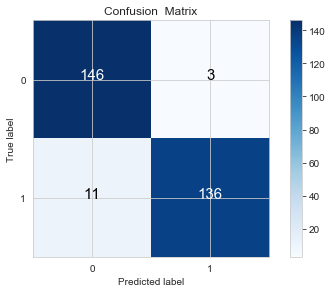

In [43]:
#도출된 최적의 parameter로 모델 생성
lr = LogisticRegression(C=best, penalty = 'l1', solver='liblinear')
lr.fit(x_sample_train, y_sample_train.values.ravel())
y_sample_pred = lr.predict(x_sample_test.values)

#혼동행렬
conf_matrix=confusion_matrix(y_sample_test, y_sample_pred)
np.set_printoptions(precision=2)

print("Recall metric in thje testing datawset : ", conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]))  #재현율

class_names=[0,1]
plt.figure()
plot_confMat(conf_matrix, class_names)
plt.show()

#### Logistic Regression - Whole data

Recall metric in thje testing datawset :  0.9251700680272109


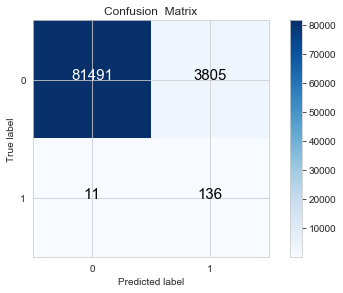

In [45]:
#도출된 최적의 parameter로 모델 생성
lr = LogisticRegression(C=best, penalty = 'l1', solver='liblinear')
lr.fit(x_sample_train, y_sample_train.values.ravel())
y_pred = lr.predict(x_test.values)

#혼동행렬
conf_matrix=confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print("Recall metric in thje testing dataset : ", conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]))  #재현율

class_names=[0,1]
plt.figure()
plot_confMat(conf_matrix, class_names)
plt.show()

#### ROC 곡선 및 정밀도-재현율 곡선 시각화
부정적인 경우(이상 거래)보다 긍정적인 경우(정상 거래)가 더 많은 경우 정밀도-재현율 곡선이 유용

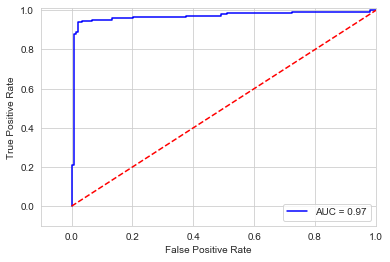

In [46]:
#ROC 곡선
lr = LogisticRegression(C = best, penalty = 'l1', solver='liblinear')
y_sample_pred_score = lr.fit(x_sample_train, y_sample_train.values.ravel()).decision_function(x_sample_test.values)

fpr, tpr, thresholds = roc_curve(y_sample_test.values.ravel(), y_sample_pred_score)
roc_auc = auc(fpr, tpr)

#plot ROC
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Logistic Regression Classifier - Skewed data

In [47]:
#전체 data에 대한 최적의 parameter - Kfold
best = kfold_score(x_train, y_train)

-------------------------------------------
C parameter :  0.01
-------------------------------------------

Iteration  0 : recall score =  0.4925373134328358

Mean recall score  0.4925373134328358

Iteration  1 : recall score =  0.6027397260273972

Mean recall score  0.5476385197301166

Iteration  2 : recall score =  0.6833333333333333

Mean recall score  0.5928701242645221

Iteration  3 : recall score =  0.5692307692307692

Mean recall score  0.5869602855060839

Iteration  4 : recall score =  0.45

Mean recall score  0.5595682284048672


##############################################################
Best model to choose from cross validation is with C parameter =  1.0
##############################################################


Recall metric in the testing dataset:  0.6190476190476191


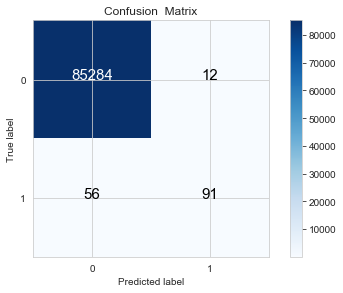

In [49]:
#전체 data에 대한 최적의 parameter로 모델 적합
lr = LogisticRegression(C = best, penalty='l1', solver='liblinear')
lr.fit(x_train, y_train.values.ravel())
y_sample_pred = lr.predict(x_test.values)

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_sample_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]))  #재현율

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confMat(conf_matrix, classes=class_names)
plt.show()

Recall metric in the testing dataset:  0.9591836734693877
Recall metric in the testing dataset:  0.9523809523809523
Recall metric in the testing dataset:  0.9455782312925171
Recall metric in the testing dataset:  0.9319727891156463
Recall metric in the testing dataset:  0.9251700680272109
Recall metric in the testing dataset:  0.9183673469387755
Recall metric in the testing dataset:  0.9047619047619048
Recall metric in the testing dataset:  0.8843537414965986
Recall metric in the testing dataset:  0.8639455782312925


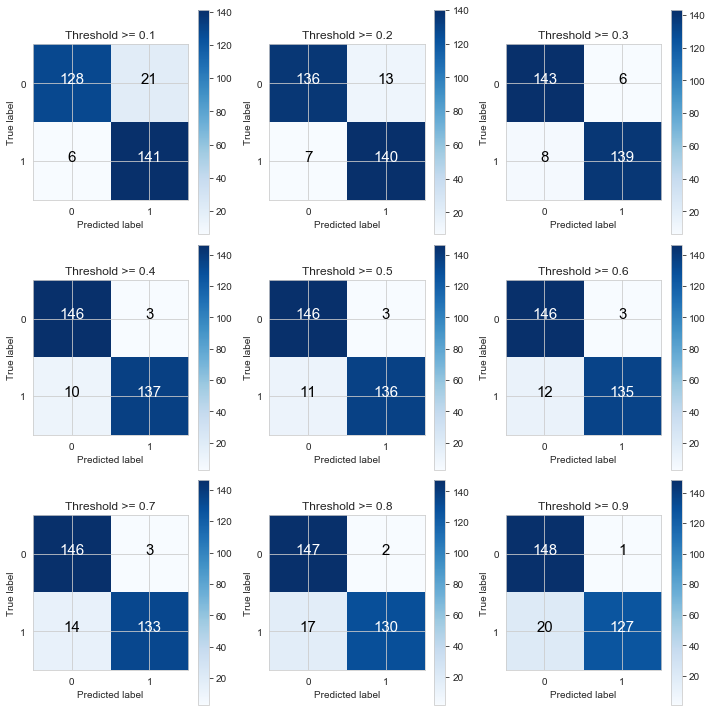

In [53]:
#best c_param = 100
lr = LogisticRegression(C = 100, penalty = 'l1', solver='liblinear')
lr.fit(x_sample_train,y_sample_train.values.ravel())
y_sample_pred_proba = lr.predict_proba(x_sample_test.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_pred_recall = y_sample_pred_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_sample_test,y_test_pred_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confMat(conf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 

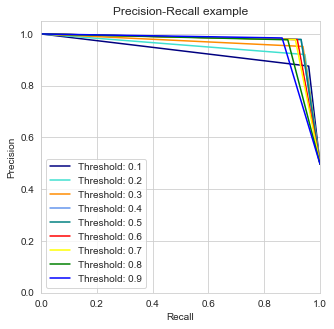

In [55]:
#precision - recall corve
from itertools import cycle

lr = LogisticRegression(C = 100, penalty = 'l1', solver='liblinear')
lr.fit(x_sample_train,y_sample_train.values.ravel())
y_sample_pred_proba = lr.predict_proba(x_sample_test.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

plt.figure(figsize=(5,5))

j = 1
for i,color in zip(thresholds,colors):
    y_test_pred_proba = y_sample_pred_proba[:,1] > i
    
    precision, recall, thresholds = precision_recall_curve(y_sample_test,y_test_pred_proba)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s'%i)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall example')
    plt.legend(loc="lower left")